Pullela Meghana   

CB.EN.U4CSE20239

FODS- LAB EVAL- 3

In [ ]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
baby = pd.read_csv('/content/test.csv')
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [ ]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [ ]:
smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [ ]:
non_smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d5c13ee20>,
      dtype=object)

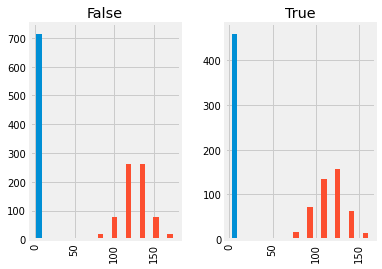

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
smoking_and_birthweight.hist(by ='Maternal Smoker')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

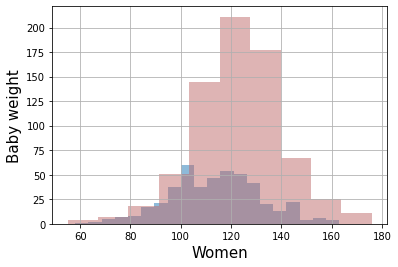

In [ ]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

1) The distribution of the weights of the babies born to mothers who smoked appears to be shifted slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower, on average than the weights of the babies of the non-smokers.



2) The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.



3) Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is just due to chance. 

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers

4) We will do the subtraction in the order "average weight of the smoking group - average weight of the non-smoking group" as test statistic . 

In [ ]:
means = smoking_and_birthweight.groupby('Maternal Smoker').mean()
means

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [ ]:
observed_diff = means['Birth Weight'][1]-means['Birth Weight'][0]
observed_diff

-9.266142572024918

5) The observed value of the test statistic is about -9.27 approximately. 

6) Predicting the Statistic Under the Null Hypothesis

In [ ]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [ ]:
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
271,True,121
897,False,112
865,True,142
440,False,100
553,False,99
...,...,...
1153,False,118
857,False,144
296,False,135
1111,True,71


In [ ]:
shuffled_weights = shuffled['Birth Weight']

In [ ]:
original_and_shuffled= smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,121
1,False,113,112
2,True,128,142
3,True,108,100
4,False,136,99
...,...,...,...
1169,False,113,118
1170,False,128,144
1171,True,130,135
1172,False,125,71


In [ ]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.921678
True,113.819172,118.747277


In [ ]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-1.3726008196596382

In [ ]:
import numpy as np
import array
differences = np.zeros(3500)
for i in np.arange(3500):
    smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [ ]:
differences

array([-1.02560751,  0.26220272, -1.84122065, ..., -0.73942746,
       -0.63926444, -1.37260082])

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.399589
1,0.455374
2,0.637814
3,-0.503329
4,0.931149
...,...
3495,-1.111462
3496,0.605619
3497,-0.220726
3498,-1.258129


Observed Difference: -9.266142572024918


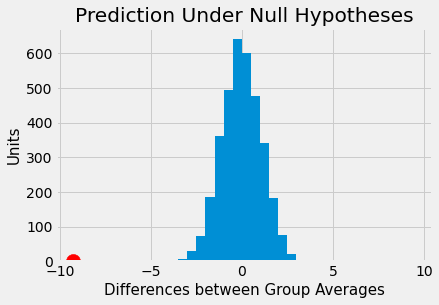

In [ ]:
#7

differences_df.hist(bins = np.arange(-5,10,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.scatter(observed_diff, 0, color='red', s=200)
print('Observed Difference:', observed_diff)

7) The distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about 9.3 approx, which falls far way from histogram in the critical region. 

In [ ]:
#8
empirical_P = np.count_nonzero(differences <= observed_diff)/differences.size
empirical_P



0.0

In [ ]:
print('Observed Distance', observed_diff)
print('Empirical P-value:', round(empirical_P, 2) *100, '%')

Observed Distance -9.266142572024918
Empirical P-value: 0.0 %


8)The empirical P-value is 0, meaning that none of the 3,500 observed samples resulted in a difference of -9.27 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

9) As the test statistic falls in critical region far away from histogram , we have enough evidence to support alternate hypothesis and to reject null hypothesis.

The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data support the alternative more than they support the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.